# PerryThePlatypusOrNotinator


A neural network designed for multi class classification of perry the platypus, a platypus or not a platapus.

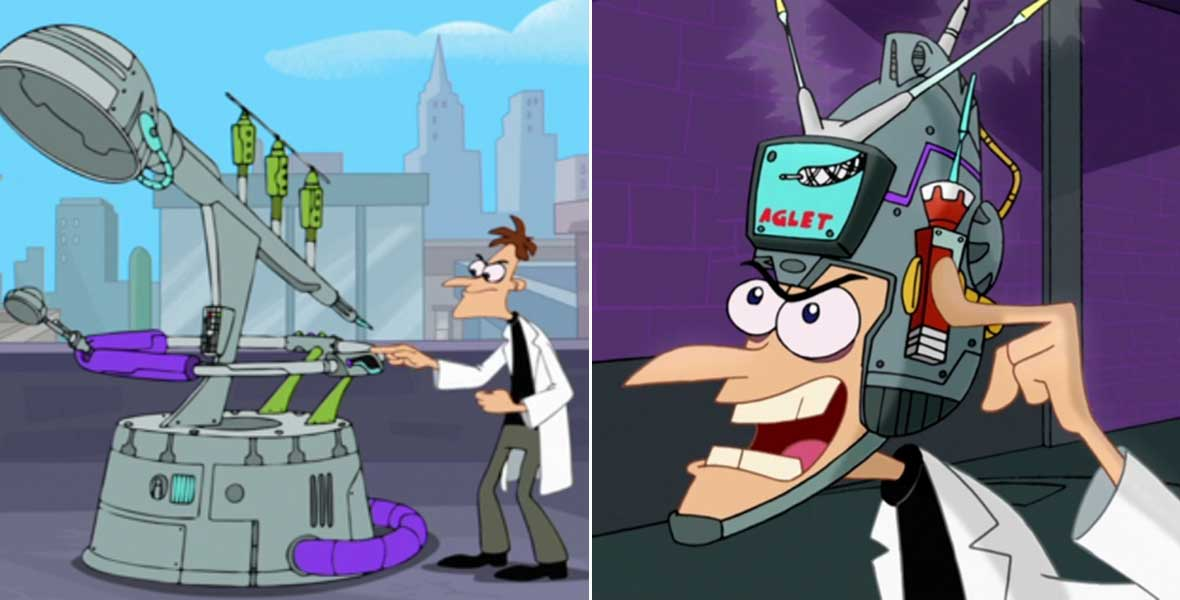


In [178]:
import torch



import torchvision
import numpy as np
import os
from torchvision import datasets
import torchvision.transforms as transforms


TRAIN_PATH = "data/train/"
TEST_PATH = "data/test/"


data_transforms = transforms.Compose([transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
     transforms.Resize((64, 64))])

trainset = datasets.ImageFolder(root = "data/train", transform=data_transforms)
testset = datasets.ImageFolder(root = "data/test", transform=data_transforms)


train_sampler = torch.utils.data.RandomSampler(trainset)
trainloader = torch.utils.data.DataLoader(trainset, batch_size = 4, sampler = train_sampler, shuffle = False, num_workers = 2)
testloader = torch.utils.data.DataLoader(testset, batch_size = 4, shuffle = False, num_workers = 2)

print("data loaded");


data loaded


In [ ]:
#build model class
import torch
import torch.nn as nn

class Inator(torch.nn.Module):
    def __init__(self):
        super(Inator, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 3, 1)
        self.relu = nn.ReLU()
        self.lin2 = nn.Linear(62*62*6, 32)
        self.fc1 = nn.Linear(32, 16)
        self.fc2 = nn.Linear(16, 8)
        self.fc3 = nn.Linear(8, 2)
    def forward(self, x):
        x = self.conv1(x)
        x = self.relu(x)
        x = x.view(x.size(0), -1)
        x = self.lin2(x)
        x = self.relu(x)
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        x = self.relu(x)
        x = self.fc3(x)
        return x
    
inator = Inator()


        

In [182]:
#test

import matplotlib.pyplot as plt

class_names = trainset.classes  # Class labelsprint(classes)

optimizer =torch.optim.SGD(inator.parameters(), .005, .9)
criterion = torch.nn.CrossEntropyLoss()


# def trainInator(model, optimizer, loss, epochs):
dataiter = iter(trainloader)
images, labels = next(dataiter)  # Get first batch

# Forward pass
outputs = inator(images)

# Compute loss (without training)
loss = criterion(outputs, labels)
print(f"Loss: {loss.item()}")

# Convert outputs to predicted class
_, predicted = torch.max(outputs, 1)

# Function to denormalize and display images
def imshow(img):
    img = img / 2 + 0.5  # Denormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.axis("off")

# Plot images with labels
fig, axes = plt.subplots(1, 4, figsize=(12, 3))
for i in range(4):
    ax = axes[i]
    img = images[i].cpu().detach()  # Convert tensor to CPU numpy array
    img = img * 0.5 + 0.5  # Denormalize
    npimg = np.transpose(img.numpy(), (1, 2, 0))
    ax.imshow(npimg)
    ax.set_title(f"True: {class_names[labels[i]]}\nPred: {class_names[predicted[i]]}")
    ax.axis("off")

plt.show()




RuntimeError: Expected 3D (unbatched) or 4D (batched) input to conv2d, but got input of size: [4, 12288]

In [ ]:
#train model?

def trainInator(loader, model, optim, criterion, epochs):
    model.train()
    for epoch in range(epochs):
        
        running_loss = 0.0
        for i, data in enumerate(loader):
            inputs, labels = data
            optim.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()
        print(f'Epoch [{epoch + 1}] - Loss: {running_loss / len(loader):.3f}')
    print("inator trained")
    return model


optimizer = torch.optim.Adam(inator.parameters(), .001)
criterion = torch.nn.CrossEntropyLoss()

# trainInator(inator, optimizer, criterion, 20)

trainInator(trainloader, inator, optimizer, criterion, 30)#model trained alr



Epoch [1] - Loss: 0.677
Epoch [2] - Loss: 0.450
Epoch [3] - Loss: 0.258
Epoch [4] - Loss: 0.157
Epoch [5] - Loss: 0.023
Epoch [6] - Loss: 0.009
Epoch [7] - Loss: 0.005
Epoch [8] - Loss: 0.001
Epoch [9] - Loss: 0.001
Epoch [10] - Loss: 0.001
Epoch [11] - Loss: 0.000
Epoch [12] - Loss: 0.000
Epoch [13] - Loss: 0.000
Epoch [14] - Loss: 0.000
Epoch [15] - Loss: 0.000
Epoch [16] - Loss: 0.000
Epoch [17] - Loss: 0.000
Epoch [18] - Loss: 0.000
Epoch [19] - Loss: 0.000
Epoch [20] - Loss: 0.000
Epoch [21] - Loss: 0.000
Epoch [22] - Loss: 0.000
Epoch [23] - Loss: 0.000
Epoch [24] - Loss: 0.000
Epoch [25] - Loss: 0.000
Epoch [26] - Loss: 0.000
Epoch [27] - Loss: 0.000
Epoch [28] - Loss: 0.000
Epoch [29] - Loss: 0.000
Epoch [30] - Loss: 0.000
inator trained


Inator(
  (lin1): Linear(in_features=12288, out_features=128, bias=True)
  (relu): ReLU()
  (lin2): Linear(in_features=128, out_features=64, bias=True)
  (fc1): Linear(in_features=64, out_features=16, bias=True)
  (fc2): Linear(in_features=16, out_features=8, bias=True)
  (fc3): Linear(in_features=8, out_features=2, bias=True)
)

In [ ]:
#test inator

def test_inator(model, loader):
    running_loss = 0
    total = 0
    correct = 0
    model.eval()
    with torch.no_grad():
        for i, data in enumerate(loader):
            inputs, labels = data
            outputs = model(inputs)
            _ , predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

        acc = 100 * correct / total

    return acc


print(test_inator(inator, testloader))

80.0


In [ ]:
#on an untrained model
dummy = Inator()
optimizer = torch.optim.SGD(dummy.parameters(), .005, .9)
criterion = torch.nn.CrossEntropyLoss()
trainInator(trainloader, dummy, optimizer, criterion, 0)


print(test_inator(dummy, testloader))


inator trained
50.0


Random index selected: 15
Displaying predictions side by side:


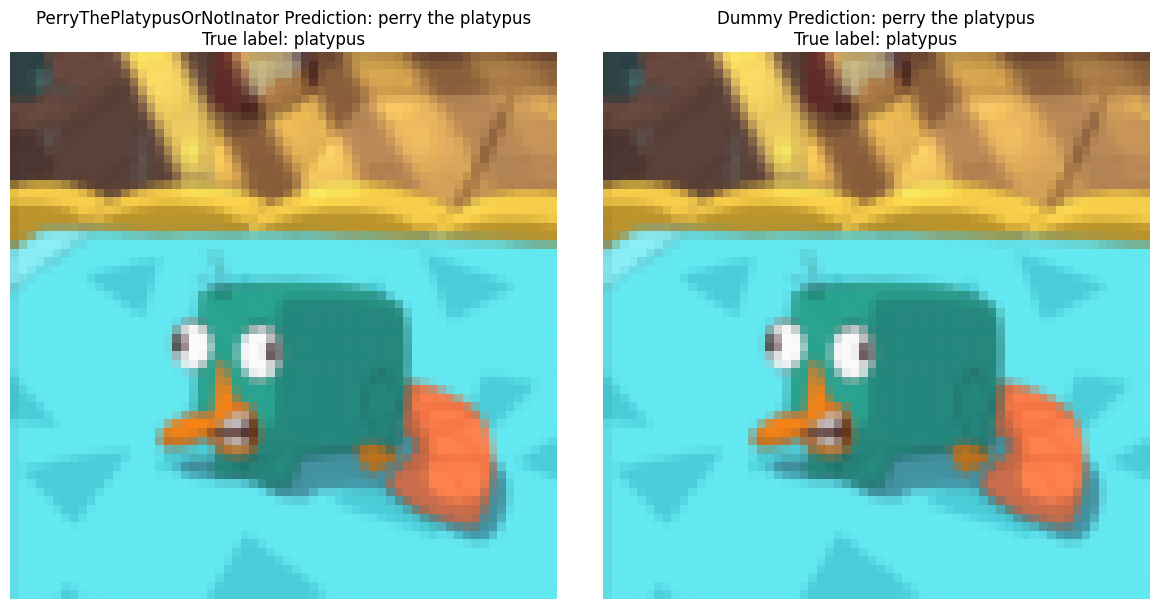

PerryThePlatypusOrNotInator prediction correct: False
Dummy prediction correct: False


In [ ]:
import matplotlib.pyplot as plt
import torch
import numpy as np

def single_prediction_side_by_side(model_1, model_2, dataset, index=0):
    model_1.eval()
    model_2.eval()

    image, label = dataset[index]

    input_tensor = image.unsqueeze(0)

    with torch.no_grad():
        output_1 = model_1(input_tensor)
        _, predicted_1 = torch.max(output_1, 1)

        output_2 = model_2(input_tensor)
        _, predicted_2 = torch.max(output_2, 1)

    class_names = dataset.classes
    predicted_class_1 = class_names[predicted_1.item()]
    predicted_class_2 = class_names[predicted_2.item()]
    true_class = class_names[label]

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

    img = image / 2 + 0.5  # Denormalize
    img = np.transpose(img.numpy(), (1, 2, 0))

    ax1.imshow(img)
    ax1.set_title(f"PerryThePlatypusOrNotInator Prediction: {predicted_class_1}\nTrue label: {true_class}")
    ax1.axis("off")

    ax2.imshow(img)
    ax2.set_title(f"Dummy Prediction: {predicted_class_2}\nTrue label: {true_class}")
    ax2.axis("off")

    plt.tight_layout()
    plt.show()

    return predicted_1.item() == label, predicted_2.item() == label

import random
random_idx = random.randint(0, len(testset)-1)
print(f"Random index selected: {random_idx}")

print("Displaying predictions side by side:")
correct_inator, correct_dummy = single_prediction_side_by_side(inator, dummy, testset, index=random_idx)

print(f"PerryThePlatypusOrNotInator prediction correct: {correct_inator}")
print(f"Dummy prediction correct: {correct_dummy}")
